# **MILESTONE 1:**

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GlobalWeatherRepository.csv")

# **Inspection of data**

In [36]:
print("Shape of dataset: ",df.shape)
print("First 5 rows: ",df.head())

Shape of dataset:  (88273, 41)
First 5 rows:         country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  16-05-2024 13:15                 26.6   
1          1715849100  16-05-2024 10:45                 19.0   
2          1715849100  16-05-2024 09:45                 23.0   
3          1715849100  16-05-2024 10:45                  6.3   
4          1715849100  16-05-2024 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8

# INFORMATION

In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88273 entries, 0 to 88272
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       88273 non-null  object 
 1   location_name                 88273 non-null  object 
 2   latitude                      88273 non-null  float64
 3   longitude                     88273 non-null  float64
 4   timezone                      88273 non-null  object 
 5   last_updated_epoch            88273 non-null  int64  
 6   last_updated                  88273 non-null  object 
 7   temperature_celsius           88273 non-null  float64
 8   temperature_fahrenheit        88273 non-null  float64
 9   condition_text                88273 non-null  object 
 10  wind_mph                      88273 non-null  float64
 11  wind_kph                      88273 non-null  float64
 12  wind_degree                   88273 non-null  int64  
 13  w

## SUMMARY OF THE DATASET


In [38]:
print(df.describe())

           latitude     longitude  last_updated_epoch  temperature_celsius  \
count  88273.000000  88273.000000        8.827300e+04         88273.000000   
mean      19.125848     22.172647        1.735507e+09            22.681788   
std       24.470798     65.836668        1.135389e+07             9.091355   
min      -41.300000   -175.200000        1.715849e+09           -24.900000   
25%        3.750000     -6.836100        1.725710e+09            18.000000   
50%       17.250000     23.316700        1.735555e+09            25.000000   
75%       40.400000     50.580000        1.745313e+09            28.400000   
max       64.150000    179.220000        1.755074e+09            49.200000   

       temperature_fahrenheit      wind_mph      wind_kph   wind_degree  \
count            88273.000000  88273.000000  88273.000000  88273.000000   
mean                72.828923      8.292613     13.348916    170.584743   
std                 16.364215      8.137603     13.093950    103.107058 

# CHECKING NULL VALUES

In [39]:
print("Missing values per column:")
print(df.isnull().sum())
print("Data coverage (non-null counts):")
print(df.count())

Missing values per column:
country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone    

# CHECKING MISSING %AGE IN EACH COLUMN

In [40]:
missing_prcntge = (df.isnull().sum() / len(df) * 100)
print("Missing percentage per column:")
print(missing_prcntge)

Missing percentage per column:
country                         0.0
location_name                   0.0
latitude                        0.0
longitude                       0.0
timezone                        0.0
last_updated_epoch              0.0
last_updated                    0.0
temperature_celsius             0.0
temperature_fahrenheit          0.0
condition_text                  0.0
wind_mph                        0.0
wind_kph                        0.0
wind_degree                     0.0
wind_direction                  0.0
pressure_mb                     0.0
pressure_in                     0.0
precip_mm                       0.0
precip_in                       0.0
humidity                        0.0
cloud                           0.0
feels_like_celsius              0.0
feels_like_fahrenheit           0.0
visibility_km                   0.0
visibility_miles                0.0
uv_index                        0.0
gust_mph                        0.0
gust_kph                        0

# **AGGREGATE THE DATE COLUMN **

In [41]:
if 'last_updated' in df.columns:
    df['last_updated'] = pd.to_datetime(df['last_updated'])
    df.set_index('last_updated', inplace=True)
    monthly_avg = df.resample('M').mean(numeric_only=True)
    print("Monthly averages:")
    print(monthly_avg.head())


Monthly averages:
               latitude  longitude  last_updated_epoch  temperature_celsius  \
last_updated                                                                  
2024-05-31    19.330079  21.252653        1.716476e+09            25.153214   
2024-06-30    19.169585  21.786945        1.718494e+09            26.456036   
2024-07-31    19.090607  22.195843        1.721096e+09            26.800448   
2024-08-31    19.107315  22.088584        1.723808e+09            26.789677   
2024-09-30    19.064397  22.147510        1.726441e+09            25.124402   

              temperature_fahrenheit  wind_mph   wind_kph  wind_degree  \
last_updated                                                             
2024-05-31                 77.275500  8.897635  14.322680   170.234384   
2024-06-30                 79.622507  9.127415  14.694197   178.421044   
2024-07-31                 80.242645  8.684089  13.979538   183.502419   
2024-08-31                 80.223093  8.643540  13.915649 

/tmp/ipython-input-2521578419.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last_updated'] = pd.to_datetime(df['last_updated'])
/tmp/ipython-input-2521578419.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M').mean(numeric_only=True)


# **MONTHLY AVR. TEMP. TREND**

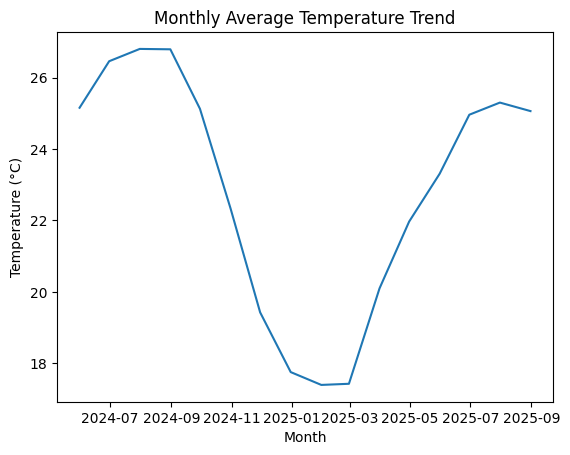

In [42]:
    plt.plot(monthly_avg.index,monthly_avg['temperature_celsius'])
    plt.title("Monthly Average Temperature Trend")
    plt.xlabel("Month")
    plt.ylabel("Temperature (°C)")
    plt.show()

## REMOVING DUPLICATE COLUMNS

In [43]:
df_cpy = df.copy()
df_cpy.drop(columns=[
    "temperature_fahrenheit","gust_mph","feels_like_fahrenheit",
    "wind_mph", "pressure_in", "precip_in",
    "visibility_miles"
], inplace=True)
print(df_cpy.head())

                         country     location_name  latitude  longitude  \
last_updated                                                              
2024-05-16 13:15:00  Afghanistan             Kabul     34.52      69.18   
2024-05-16 10:45:00      Albania            Tirana     41.33      19.82   
2024-05-16 09:45:00      Algeria           Algiers     36.76       3.05   
2024-05-16 10:45:00      Andorra  Andorra La Vella     42.50       1.52   
2024-05-16 09:45:00       Angola            Luanda     -8.84      13.23   

                           timezone  last_updated_epoch  temperature_celsius  \
last_updated                                                                   
2024-05-16 13:15:00      Asia/Kabul          1715849100                 26.6   
2024-05-16 10:45:00   Europe/Tirane          1715849100                 19.0   
2024-05-16 09:45:00  Africa/Algiers          1715849100                 23.0   
2024-05-16 10:45:00  Europe/Andorra          1715849100                  6

In [44]:
df_cpy.shape

(88273, 33)